# Data Understanding

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
%matplotlib inline

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# laoding data
customer_table = pd.read_csv('/content/drive/MyDrive/Case Study Data Scientist/Customer.csv', sep=';')
product_table = pd.read_csv('/content/drive/MyDrive/Case Study Data Scientist/Product.csv', sep=';')
store_table = pd.read_csv('/content/drive/MyDrive/Case Study Data Scientist/Store.csv', sep=';')
transaction_table = pd.read_csv('/content/drive/MyDrive/Case Study Data Scientist/Transaction.csv', sep=';')

## Deskripsi Tabel

In [4]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
product_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [6]:
store_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [7]:
transaction_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


# Data Preparation

In [8]:
# ubah tanggal transaksi menjadi format datetime
transaction_table['Date'] = pd.to_datetime(transaction_table['Date'], format='%d/%m/%Y')

## Menangani missing value

In [9]:
customer_table.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [10]:
product_table.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [11]:
store_table.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [12]:
transaction_table.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

Karena pada tabel customer, terdapat customer dengan marital status kosong, kita akan mengisinya dengan marital status yang paling sering muncul.

In [13]:
customer_table['Marital Status'].fillna(customer_table['Marital Status'].mode()[0], inplace=True)

In [14]:
customer_table.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

## Menggabungkan tabel

In [15]:
merged_data = pd.merge(transaction_table, product_table, on='ProductID', how='left')
merged_data = pd.merge(merged_data, store_table, on='StoreID', how='left')
merged_data = pd.merge(merged_data, customer_table, on='CustomerID', how='left')
merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",44,1,Married,"14,58"
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",27,1,Single,"0,18"
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",48,1,Married,"12,57"
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",33,0,Married,"6,95"


In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   Price_y         5020 non-null   int64         
 10  StoreName       5020 non-null   object        
 11  GroupStore      5020 non-null   object        
 12  Type            5020 non-null   object        
 13  Latitude        5020 non-null   object        
 14  Longitude       5020 non-null   object        
 15  Age 

## Membuat data baru untuk clustering

In [17]:
cluster_df = merged_data.groupby('CustomerID').agg({'TransactionID':'count',
                                                   'Qty':'sum',
                                                   'TotalAmount':'sum'}).reset_index()
cluster_df

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [18]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     447 non-null    int64
 1   TransactionID  447 non-null    int64
 2   Qty            447 non-null    int64
 3   TotalAmount    447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [19]:
cluster_data = cluster_df.drop(columns = ['CustomerID'])
cluster_data.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [20]:
cluster_data.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

## Standarisasi dataset

In [21]:
clustering = MinMaxScaler().fit_transform(cluster_data)
clustering

array([[0.77777778, 0.72463768, 0.70394911],
       [0.55555556, 0.68115942, 0.39782666],
       [0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.83333333, 0.84057971, 0.6561092 ],
       [0.44444444, 0.46376812, 0.43890803],
       [0.55555556, 0.46376812, 0.46011132]])

# Modeling

In [22]:
inertia= []
for n in range (1,11):
    model = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model.fit(clustering)
    inertia.append(model.inertia_)

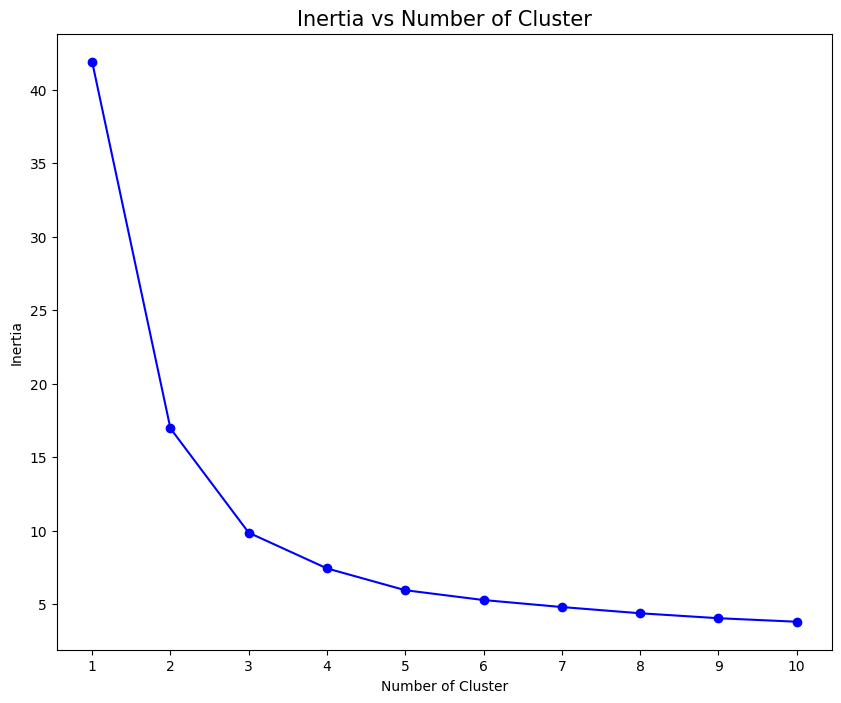

In [23]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), inertia, color = 'blue', marker='o')
plt.title('Inertia vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.xticks(list(range(1,11)))
plt.show()

Berdasarkan elbow method, cluster terbaik adalah 3 kelompok.

In [24]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans.fit(clustering)

KMeans(n_clusters=3, n_init=10, random_state=100)

In [25]:
cluster_data['cluster'] = kmeans.labels_
cluster_data.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,1
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,0
4,7,27,268600,2


## Evaluasi jumlah cluster

In [26]:
from sklearn.metrics import davies_bouldin_score

results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    labels = kmeans.fit_predict(clustering)
    db_index = davies_bouldin_score(clustering, labels)
    results.update({i: db_index})

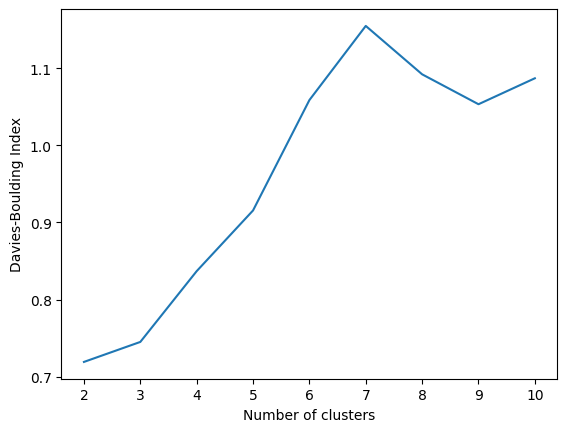

In [27]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Terlihat dari indeks davies-boulding, untuk cluster 3 memiliki indeks yang cukup rendah, dimana artinya jumlah cluster tersebut sudah terpisah dengan baik.

## Visualisasi cluster

<Axes: xlabel='Qty', ylabel='TotalAmount'>

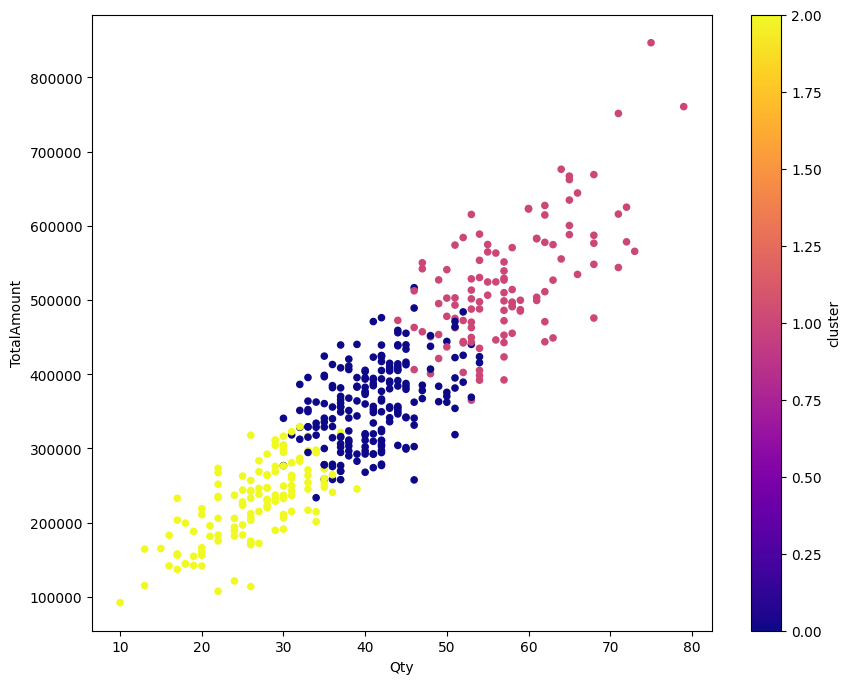

In [28]:
cluster_data.plot(kind='scatter', x='Qty', y='TotalAmount', c='cluster', cmap='plasma', figsize=(10,8), legend=True)

# Interpretasi dan Analisis

In [36]:
merged_data['RecentPurchase'] = (pd.to_datetime('2023-01-01') - merged_data['Date']).dt.days.astype('int')
recent_customers = merged_data.groupby('CustomerID').agg({'RecentPurchase':'min'})
recent_customers.sort_values(by='RecentPurchase',ascending=True)

,RecentPurchase
CustomerID,
232,1
395,1
52,1
18,1
55,1
...,...
110,178
50,178
259,181


In [37]:
cluster_data = pd.merge(cluster_data, recent_customers, on='CustomerID', how='left')
cluster_data.head()

,TransactionID,Qty,TotalAmount,cluster,CustomerID,RecentPurchase
0,17,60,623300,1,1,26
1,13,57,392300,1,2,25
2,15,56,446200,1,3,10
3,10,46,302500,0,4,5
4,7,27,268600,2,5,28


In [39]:
import seaborn as sns

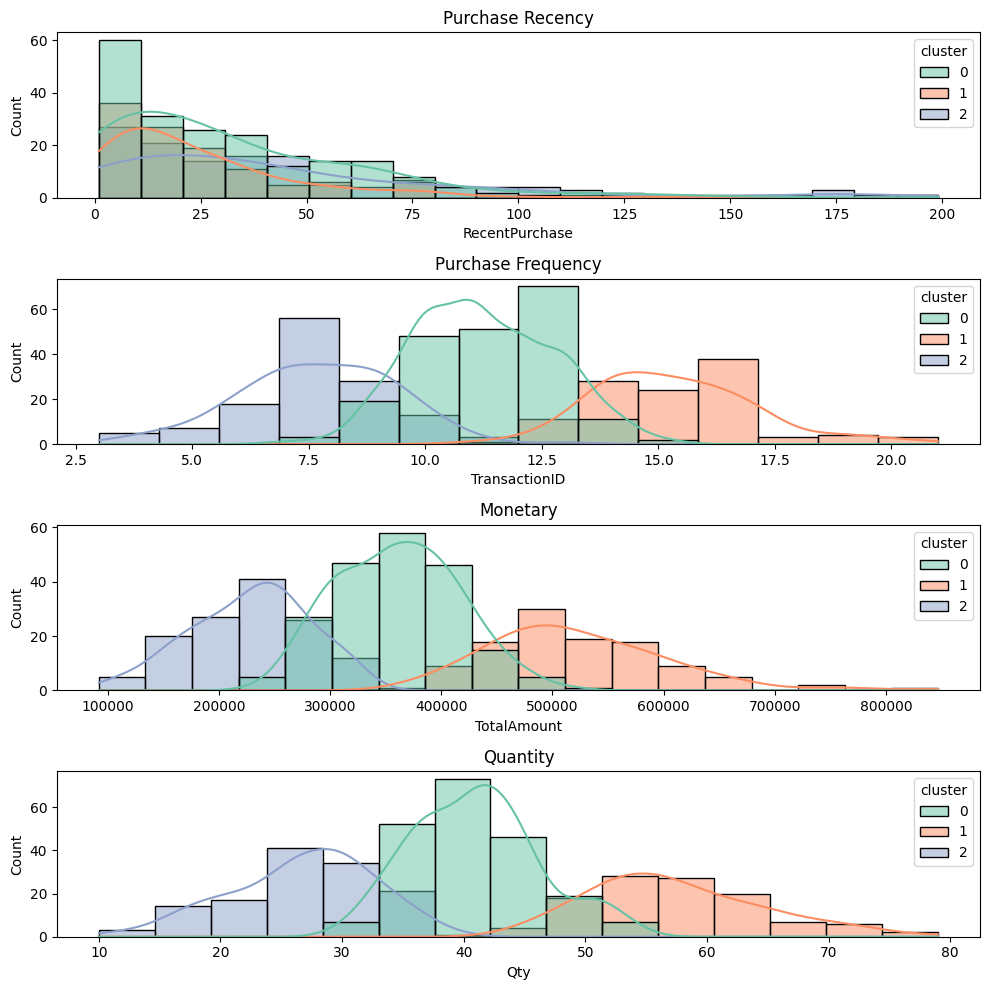

In [40]:
fig, ax = plt.subplots(4,1,figsize=(10,10))

sns.histplot(data=cluster_data,x='RecentPurchase',hue='cluster',palette='Set2',ax=ax[0],kde=True)
ax[0].set_title('Purchase Recency')
sns.histplot(data=cluster_data,x='TransactionID',hue='cluster',palette='Set2',ax=ax[1],kde=True)
ax[1].set_title('Purchase Frequency')
sns.histplot(data=cluster_data,x='TotalAmount',hue='cluster',palette='Set2',ax=ax[2],kde=True)
ax[2].set_title('Monetary')
sns.histplot(data=cluster_data,x='Qty',hue='cluster',palette='Set2',ax=ax[3],kde=True)
ax[3].set_title('Quantity')

plt.tight_layout()
plt.show()

In [45]:
cluster_data['CustomerID'] = cluster_df['CustomerID']
cluster_data.groupby(['cluster']).agg({
    'CustomerID' : 'count',
    'TotalAmount' : 'mean',
    'Qty' : 'mean',
})

,CustomerID,TotalAmount,Qty
cluster,,,
0,204,360686.274510,40.980392
1,112,522525.892857,57.455357
2,131,228550.381679,26.725191


Berdasarkan statistik deskriptif tersebut, kelompok konsumen berdasarkan karakteristiknya adalah sebagai berikut:

1.  Cluster 0 (Active customer)
- Kelompok dengan jumlah konsumen terbanyak
- Banyak konsumen dengan riwayat transaksi baru
- Frekuensi berbelanja medium (rentang 7-15 kali)
- Daya beli medium (total belanja 25.000-50.000 dan jumlah barang yang dibeli 30-55 barang)

Strategi:
- Memberikan kode voucher untuk menambah jumlah pembelian
- Membangun hubungan dengan konsumen

2. Cluster 1 (Loyal customer)
- Kelompok dengan jumlah konsumen paling sedikit
- Riwayat transaksi di rentang medium
- Frekuensi belanja tinggi (12-20 kali)
- Daya beli tinggi (total belanja 40.000-70.000, jumlah yang dibeli 40-75 barang)

Strategi:
- Memberikan program loyalty
- Memberikan survei kepuasan pelanggan

3. Cluster 2 (Potential customer)
- Kelompok dengan jumlah konsumen sedang
- Riwayat transaksi cenderung lama
- Frekuensi belanja rendah (3-12 kali)
- Daya beli rendah (total belanja 10.000-35.000, jumlah barang yang dibeli 10-35 barang)

Strategi:
- Memberikan diskon dan promo untuk jumlah pembelian banyak
- Membuat promo bundling
- Memberikan survei untuk mengetahui potensi pengembangan produk